# Data Collection

In [17]:
# Retreive the Bicycle Theft Dataset from Toronto Open Data API

import requests

base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
url = base_url + "/api/3/action/package_show"
params = { "id": "bicycle-thefts"}
package = requests.get(url, params = params).json()


# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

    # For datastore_active resources:
    if resource["datastore_active"]:

        # To get all records in CSV format:
        url = base_url + "/datastore/dump/" + resource["id"]
        try:
            resource_dump_data = requests.get(url).text
            # Success message
            print("Data retrieved successfully.")
        except requests.exceptions.RequestException as e:
            # Error message
            print(f"Error retrieving data: {e}")          

Data retrieved successfully.


In [18]:
# Create pandas Dataframe

import pandas as pd
from io import StringIO

# read csv file into pandas dataframe
csv_file = StringIO(resource_dump_data)
data = pd.read_csv(csv_file)

# Print the DataFrame
data.head()

,_id,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,geometry
0,1,GO-20141263784,PROPERTY - FOUND,NaN,2014,January,Wednesday,1,1,18,...,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.0,BLK,NaN,RECOVERED,"{""type"": ""Point"", ""coordinates"": [-79.41465353..."
1,2,GO-20141261431,THEFT UNDER,NaN,2014,January,Wednesday,1,1,7,...,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.0,NaN,NaN,STOLEN,"{""type"": ""Point"", ""coordinates"": [-79.44364511..."
2,3,GO-20141263544,B&E,1388-03-04,2013,December,Thursday,26,360,19,...,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.0,SILRED,1300.0,STOLEN,"{""type"": ""Point"", ""coordinates"": [-79.39564273..."
3,4,GO-20141266048,THEFT UNDER,NaN,2013,December,Monday,30,364,17,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.0,WHI,500.0,STOLEN,"{""type"": ""Point"", ""coordinates"": [-79.42956569..."
4,5,GO-20149000090,THEFT UNDER,NaN,2014,January,Wednesday,1,1,12,...,"Apartment (Rooming House, Condo)",Apartment,GI,TCX2 (2010),OT,9.0,BLU,1019.0,STOLEN,"{""type"": ""Point"", ""coordinates"": [-79.39376003..."


# Exploratory data analysis (EDA)

In [19]:
# Retrieve list of columns, their data types, and information about missing values.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35325 entries, 0 to 35324
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              35325 non-null  int64  
 1   EVENT_UNIQUE_ID  35325 non-null  object 
 2   PRIMARY_OFFENCE  35325 non-null  object 
 3   OCC_DATE         5888 non-null   object 
 4   OCC_YEAR         35325 non-null  int64  
 5   OCC_MONTH        35325 non-null  object 
 6   OCC_DOW          35325 non-null  object 
 7   OCC_DAY          35325 non-null  int64  
 8   OCC_DOY          35325 non-null  int64  
 9   OCC_HOUR         35325 non-null  int64  
 10  REPORT_DATE      5923 non-null   object 
 11  REPORT_YEAR      35325 non-null  int64  
 12  REPORT_MONTH     35325 non-null  object 
 13  REPORT_DOW       35325 non-null  object 
 14  REPORT_DAY       35325 non-null  int64  
 15  REPORT_DOY       35325 non-null  int64  
 16  REPORT_HOUR      35325 non-null  int64  
 17  DIVISION    

In [20]:
# Summary of statistics for the DataFrame columns.
data.describe()

,_id,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,BIKE_SPEED,BIKE_COST
count,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,34693.000000,32926.000000
mean,17663.000000,2018.442604,15.652880,200.644020,13.289795,2018.464940,15.974013,201.559604,14.229837,14.073358,999.406544
std,10197.593466,2.802540,8.631748,78.515049,6.537182,2.784161,8.598645,78.838236,5.083219,10.674541,1618.407811
min,1.000000,1975.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8832.000000,2016.000000,8.000000,150.000000,9.000000,2016.000000,9.000000,151.000000,11.000000,6.000000,395.000000
50%,17663.000000,2018.000000,16.000000,204.000000,14.000000,2018.000000,16.000000,205.000000,14.000000,15.000000,666.000000
75%,26494.000000,2021.000000,23.000000,259.000000,18.000000,2021.000000,23.000000,260.000000,18.000000,21.000000,1149.997500
max,35325.000000,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,99.000000,120000.000000


In [21]:
# Print the number of rows and columns
print("the dimension:", data.shape)

the dimension: (35325, 28)


In [22]:
# Selects the values of the first row of DataFrame
data_values = data.iloc[0]
data_values

_id                                                                1
EVENT_UNIQUE_ID                                       GO-20141263784
PRIMARY_OFFENCE                                     PROPERTY - FOUND
OCC_DATE                                                         NaN
OCC_YEAR                                                        2014
OCC_MONTH                                                    January
OCC_DOW                                                    Wednesday
OCC_DAY                                                            1
OCC_DOY                                                            1
OCC_HOUR                                                          18
REPORT_DATE                                                      NaN
REPORT_YEAR                                                     2014
REPORT_MONTH                                                 January
REPORT_DOW                                                 Wednesday
REPORT_DAY                        

In [23]:
# Print unique values for categorical values
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = data[col].nunique()
    print("Unique count of column '{}': {}".format(col, unique_count))

Unique count of column 'EVENT_UNIQUE_ID': 31540
Unique count of column 'PRIMARY_OFFENCE': 76
Unique count of column 'OCC_DATE': 606
Unique count of column 'OCC_MONTH': 12
Unique count of column 'OCC_DOW': 7
Unique count of column 'REPORT_DATE': 606
Unique count of column 'REPORT_MONTH': 12
Unique count of column 'REPORT_DOW': 7
Unique count of column 'DIVISION': 18
Unique count of column 'LOCATION_TYPE': 46
Unique count of column 'PREMISES_TYPE': 7
Unique count of column 'BIKE_MAKE': 1176
Unique count of column 'BIKE_MODEL': 10888
Unique count of column 'BIKE_TYPE': 13
Unique count of column 'BIKE_COLOUR': 282
Unique count of column 'STATUS': 3
Unique count of column 'geometry': 6971


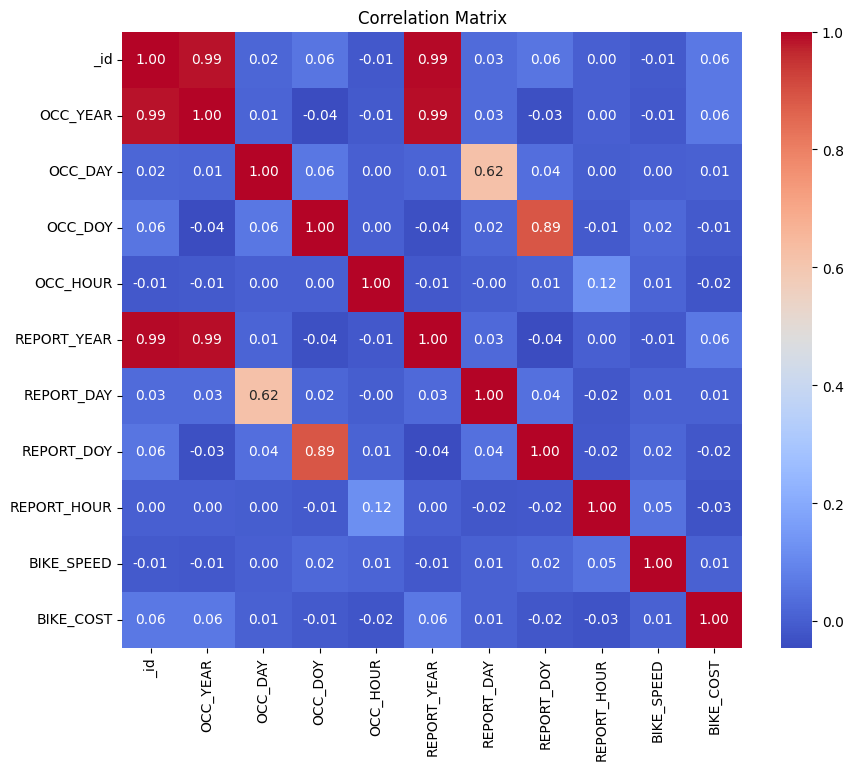

In [24]:
# Visualize corelation

import seaborn as sns
import matplotlib.pyplot as plt

data_correlation = data.corr(numeric_only=True)

# Plot correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


###### Strong correlations are only evident among interrelated columns, such as (ID -> year) and (report day or year -> occurrence day or year). No significant correlations are observed among other variables.

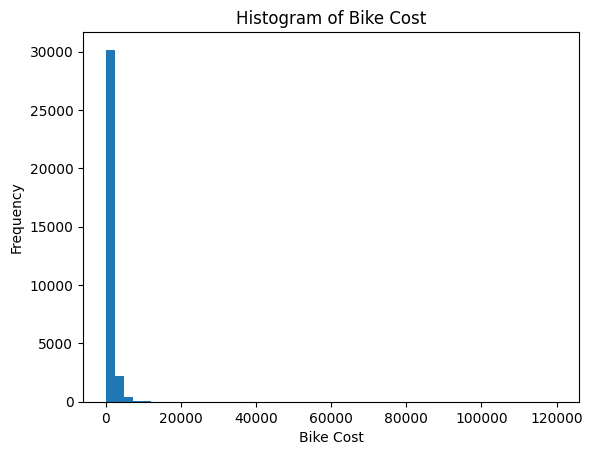

In [25]:
# Display frenquency of Bike cost
plt.hist(data['BIKE_COST'], bins=50)
plt.xlabel('Bike Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Bike Cost')
plt.show()



###### Data seems to have huge outliers. Let's take a close look.

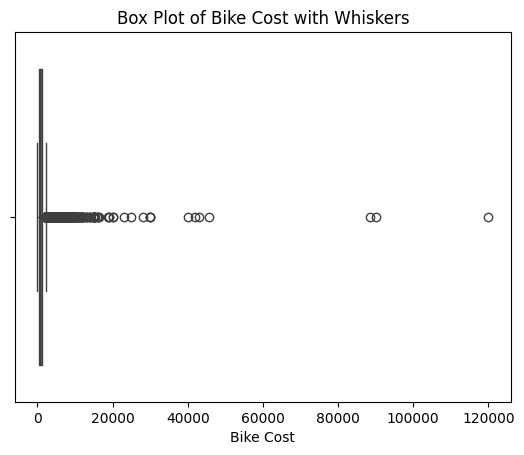

In [26]:
import seaborn as sns

# Create a box plot to visualize outliers in the BIKE_COST column
sns.boxplot(x=data['BIKE_COST'], whis=1.5)
plt.xlabel('Bike Cost')
plt.title('Box Plot of Bike Cost')
plt.show()


In [27]:
import numpy as np

# Display the count of bike cost values grouped into bins of 1000 or more.

bin_edges = np.arange(0, int(data['BIKE_COST'].max()) + 1501, 1500)

bin_counts = pd.cut(data['BIKE_COST'], bins=bin_edges).value_counts().sort_index()

bin_counts.index = [f'{left}-{right}' for left, right in zip(bin_edges[:-1], bin_edges[1:])]

bin_counts_filtered = bin_counts[bin_counts != 0]

print(bin_counts_filtered)

0-1500           26199
1500-3000         3668
3000-4500          790
4500-6000          340
6000-7500           92
7500-9000           66
9000-10500          46
10500-12000         15
12000-13500          5
13500-15000         14
15000-16500          5
18000-19500          3
19500-21000          2
22500-24000          1
24000-25500          1
27000-28500          1
28500-30000          2
30000-31500          1
39000-40500          1
40500-42000          1
42000-43500          1
45000-46500          1
87000-88500          1
90000-91500          1
118500-120000        1
Name: count, dtype: int64


###### The majority of the data falls into bicycles that costs less than $6,000. As we can see, the dataset contains a significant amount of outliers.

In [28]:
# Show unique values of the 'OCC_YEAR' column
data['OCC_YEAR'].value_counts().sort_index()

OCC_YEAR
1975       1
1983       1
2009       1
2010       2
2011       3
2012       2
2013      46
2014    3067
2015    3310
2016    3858
2017    3917
2018    3992
2019    3750
2020    3919
2021    3184
2022    2983
2023    2974
2024     315
Name: count, dtype: int64

# Data Cleaning and Transformation

In [29]:
# Filter data for data after 2018. 
data1 = data[data['OCC_YEAR'] > 2018]
data1['OCC_YEAR'].value_counts().sort_index()

OCC_YEAR
2019    3750
2020    3919
2021    3184
2022    2983
2023    2974
2024     315
Name: count, dtype: int64

In [30]:
# Get count and percentage of Null Values
data_null_count = data1.isnull().sum()
data_null_percentage = (data1.isnull().sum() / data1.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
_id,0,0.000000
EVENT_UNIQUE_ID,0,0.000000
PRIMARY_OFFENCE,0,0.000000
OCC_DATE,14251,83.217518
OCC_YEAR,0,0.000000
OCC_MONTH,0,0.000000
OCC_DOW,0,0.000000
OCC_DAY,0,0.000000
OCC_DOY,0,0.000000
OCC_HOUR,0,0.000000


In [31]:
# REPORT_DATE and OCC_DATE columns have 83% missing values. We will recreate these columns by concatenating the other date columns.

data1['OCC_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['OCC_YEAR'])}-{int(row['OCC_DOY']):03d}", format='%Y-%j').date(), axis=1)
data1['REPORT_FULL_DATE'] = data1.apply(lambda row: pd.to_datetime(f"{int(row['REPORT_YEAR'])}-{int(row['REPORT_DOY']):03d}", format='%Y-%j').date(), axis=1)

C:\Users\Robins\AppData\Local\Temp\ipykernel_18836\651106330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['OCC_FULL_DATE'] = data.apply(lambda row: pd.to_datetime(f"{int(row['OCC_YEAR'])}-{int(row['OCC_DOY']):03d}", format='%Y-%j').date(), axis=1)
C:\Users\Robins\AppData\Local\Temp\ipykernel_18836\651106330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['REPORT_FULL_DATE'] = data.apply(lambda row: pd.to_datetime(f"{int(row['REPORT_YEAR'])}-{int(row['REPORT_DOY']):03d}", format='%Y-%j

##### Handle missing values in the column 'BIKE_COST' with the Random Forest Regressor from the scikit-learn library

In [32]:
print("Average:", data1['BIKE_COST'].mean())
print("Median", data1['BIKE_COST'].median())
print("Mode:", data1['BIKE_COST'].mode())

Average: 1088.2018124649771
Median 700.0
Mode: 0    500.0
Name: BIKE_COST, dtype: float64


###### With 6% missing values in 'BIKE_COST', filling null values with mode, mean, or median will misrepresent the frequency of stolen bikes within specific bins. We will employ a machine learning model that analyzes bike characteristics in the dataset to estimate the cost.

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# copy the dataset
data2 = data1.copy()

# Selection of columns needed prediction (bike characteristics)
selected_columns = ['BIKE_COST', 'BIKE_COLOUR', 'BIKE_SPEED', 'BIKE_TYPE', 'BIKE_MAKE']

# Filter the data to include only the selected columns
df_selected = data2[selected_columns]

# Apply label encoding only to non-numeric columns
non_numeric_columns = df_selected.select_dtypes(include=['object']).columns
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    df_selected[column] = label_encoders[column].fit_transform(df_selected[column])

# Split the dataset into features and target variable
X = df_selected.dropna().drop(columns=['BIKE_COST'])
y = df_selected.dropna()['BIKE_COST']

# Initialize the regression model (Random Forest Regression)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
regressor.fit(X, y)

# Selects rows with missing 'BIKE_COST', then removes column, then assigns the remaining columns to X_missing.
X_missing = df_selected[df_selected['BIKE_COST'].isnull()].drop(columns=['BIKE_COST'])

# Removing outliers before filling missing values with estimates
outliers_index = df_selected['BIKE_COST'] > df_selected['BIKE_COST'].quantile(0.95)
X_outliers = df_selected[outliers_index].drop(columns=['BIKE_COST'])
y_outliers = df_selected[outliers_index]['BIKE_COST']
X_clean = df_selected[~outliers_index].drop(columns=['BIKE_COST'])
y_clean = df_selected[~outliers_index]['BIKE_COST']

predicted_values = regressor.predict(X_missing)

# Update the new DataFrame data2 with the predicted values using .loc
data2.loc[df_selected['BIKE_COST'].isnull(), 'BIKE_COST'] = predicted_values

# Create a copy of the DataFrame to include outliers
data_with_outliers = data2.copy()

# Return estimates and outliers into a copy of the DataFrame
data_with_outliers.loc[outliers_index, 'BIKE_COST'] = regressor.predict(X_outliers)




C:\Users\Robins\AppData\Local\Temp\ipykernel_18836\2081526140.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = label_encoders[column].fit_transform(df_selected[column])
C:\Users\Robins\AppData\Local\Temp\ipykernel_18836\2081526140.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = label_encoders[column].fit_transform(df_selected[column])
C:\Users\Robins\AppData\Local\Temp\ipykernel_18836\2081526140.py:20: SettingWithCopyWarning: 
A value is trying to be set 

###### Note: Outliers were temporarily removed to estimate missing values in bike cost. Once the estimates were completed, the outliers were reintegrated into the dataset. We decided to keep outliers for reporting purposes.

In [34]:
# Create df_test as a copy of data1 to compare the effects of filling null values with mean
df_test = data1.copy()

# Fill missing values in 'Bicycle Value' column with the mean 
mean_bicycle_value = data1['BIKE_COST'].mean()
df_test['BIKE_COST'].fillna(mean_bicycle_value, inplace=True)

C:\Users\Robins\AppData\Local\Temp\ipykernel_18836\767991965.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BIKE_COST'].fillna(mean_bicycle_value, inplace=True)


In [35]:
# Define range bins and labels
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000+']

# Function to calculate frequency counts and percentages
def calculate_frequency(df):
    # Calculate frequency counts
    counts, _ = np.histogram(df['BIKE_COST'], bins=bins)

    # Calculate total count
    total_count = sum(counts)

    # Calculate percentages
    percentages = [count / total_count * 100 for count in counts]

    return counts, percentages

# Calculate frequency counts and percentages for each DataFrame
data1_counts, data1_percentages = calculate_frequency(data1)
df_test_counts, df_test_percentages = calculate_frequency(df_test)
data2_counts, data2_percentages = calculate_frequency(data2)

# Print results one on top of the other
print("Original Data:")
print("Range      | Count          | Percentage")
print("------------------------------------------")
for label, data1_count, data1_percent in zip(labels, data1_counts, data1_percentages):
    print(f"{label:<10} | {data1_count:<14} | {data1_percent:.2f}%")

print("\nNull Values Filled with Mean:")
print("Range      | Count          | Percentage")
print("------------------------------------------")
for label, df_test_count, df_test_percent in zip(labels, df_test_counts, df_test_percentages):
    print(f"{label:<10} | {df_test_count:<14} | {df_test_percent:.2f}%")

print("\nNulled Values fill using ML Model:")
print("Range      | Count          | Percentage")
print("------------------------------------------")
for label, data2_count, data2_percent in zip(labels, data2_counts, data2_percentages):
    print(f"{label:<10} | {data2_count:<14} | {data2_percent:.2f}%")


Original Data:
Range      | Count          | Percentage
------------------------------------------
0-500      | 4753           | 29.59%
500-1000   | 5270           | 32.81%
1000-1500  | 2629           | 16.37%
1500-2000  | 1039           | 6.47%
2000+      | 2370           | 14.76%

Null Values Filled with Mean:
Range      | Count          | Percentage
------------------------------------------
0-500      | 4753           | 27.75%
500-1000   | 5270           | 30.77%
1000-1500  | 3693           | 21.56%
1500-2000  | 1039           | 6.07%
2000+      | 2370           | 13.84%

Nulled Values fill using ML Model:
Range      | Count          | Percentage
------------------------------------------
0-500      | 4933           | 28.81%
500-1000   | 5608           | 32.75%
1000-1500  | 2843           | 16.60%
1500-2000  | 1167           | 6.81%
2000+      | 2574           | 15.03%


###### The distribution of bike costs shows a significant shift between the original dataset and the one where null values are replaced with the mean of bike costs. This shift is seen in the 1000-1500 range (mean is: 1088.20). This resulted in a 5% increase in that range. Using the ML model provides a more precise method for handling NA values. As demonstrated above, the percentage difference in each range between the original dataset and the one processed with the ML model is really small, keeping th distribution of data optimized.

##### Handle missing values from remaining columns 

In [36]:
# Handle Missing Values

# Bike Make & Bike Color fill na with mode (categorical column)
bike_make_mode = data2['BIKE_MAKE'].mode()[0]
data2.loc[:, 'BIKE_MAKE'] = data2['BIKE_MAKE'].fillna(bike_make_mode)

bike_colour_mode = data2['BIKE_COLOUR'].mode()[0]
data2.loc[:, 'BIKE_COLOUR'] = data2['BIKE_COLOUR'].fillna(bike_colour_mode)

#Bike Speed & Bike Cost fill na with mean (numerical column)
bike_speed_mean = data2['BIKE_SPEED'].mean()
bike_cost_mean = data2['BIKE_COST'].mean()

data2.loc[:, 'BIKE_SPEED'] = data2['BIKE_SPEED'].fillna(bike_speed_mean)
data2.loc[:, 'BIKE_COST'] = data2['BIKE_COST'].fillna(bike_cost_mean)

#drop columns with more than 30% missing values
data2 = data2.drop(columns=['REPORT_DATE', 'OCC_DATE', 'BIKE_MODEL'], inplace=False)


In [37]:
# Verify that there are no more Null Values
data_null_count = data2.isnull().sum()
data_null_percentage = (data2.isnull().sum() / data2.shape[0]) * 100
null_values = pd.DataFrame({
    'Null Count': data_null_count,
    'Null Percentage': data_null_percentage
})
null_values

,Null Count,Null Percentage
_id,0,0.0
EVENT_UNIQUE_ID,0,0.0
PRIMARY_OFFENCE,0,0.0
OCC_YEAR,0,0.0
OCC_MONTH,0,0.0
OCC_DOW,0,0.0
OCC_DAY,0,0.0
OCC_DOY,0,0.0
OCC_HOUR,0,0.0
REPORT_YEAR,0,0.0


# Location Extraction

In [38]:
# Extract latitude and longitude coordinates from a JSON geometry object (geometry column)

import json

def extract_coordinates(geometry):
    geometry_json = json.loads(geometry)
    return geometry_json['coordinates'][1], geometry_json['coordinates'][0]

# Apply function to create latitude and longitude columns
data2['Latitude'], data2['Longitude'] = zip(*data2['geometry'].apply(extract_coordinates))


In [39]:
'''

from tqdm import tqdm
from geopy.geocoders import Nominatim

# Function to retrieve address components from latitude and longitude using a geocoding service.
def get_address_components(latitude, longitude):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.reverse((latitude, longitude), language='en')
    address_components = location.raw['address']
    return address_components

# Iterate over each row in the dataset and retrieve address components based on latitude and longitude coordinates
num_rows = len(data2)
# Initialize a progress bar to track the iteration progress
with tqdm(total=num_rows) as pbar:
    for index, row in data2.iterrows():
        # Retrieve address components using the defined function
        address_components = get_address_components(row['Latitude'], row['Longitude'])
        # Update the DataFrame with the retrieved address components
        data2.at[index, 'Road'] = address_components.get('road', None)
        data2.at[index, 'Neighbourhood'] = address_components.get('neighbourhood', None)
        data2.at[index, 'Quarter'] = address_components.get('quarter', None)
        # Update the progress bar
        pbar.update(1)

# Filter the DataFrame to keep only the desired columns
road_mapping = data2[['EVENT_UNIQUE_ID', 'Road', 'Neighbourhood', 'Quarter']]

# Print the filtered DataFrame
road_mapping.head()

# Save mapping table 
road_mapping.to_excel('../Data/TOR_Data.xlsx', index=False) 

'''


'\n\nfrom tqdm import tqdm\nfrom geopy.geocoders import Nominatim\n\n# Function to retrieve address components from latitude and longitude using a geocoding service.\ndef get_address_components(latitude, longitude):\n    geolocator = Nominatim(user_agent="my_geocoder")\n    location = geolocator.reverse((latitude, longitude), language=\'en\')\n    address_components = location.raw[\'address\']\n    return address_components\n\n# Iterate over each row in the dataset and retrieve address components based on latitude and longitude coordinates\nnum_rows = len(data2)\n# Initialize a progress bar to track the iteration progress\nwith tqdm(total=num_rows) as pbar:\n    for index, row in data2.iterrows():\n        # Retrieve address components using the defined function\n        address_components = get_address_components(row[\'Latitude\'], row[\'Longitude\'])\n        # Update the DataFrame with the retrieved address components\n        data2.at[index, \'Road\'] = address_components.get(\'roa

###### This step iterates through 17k rows and may take more than 1h. Status bar is shown to visualize progress. API limits may apply while using geocoders to extract address components. Save the mapping table to avoid running the code each time we run this notebook.  

In [40]:
# Save the DataFrame to an Excel file for use in Power BI for visualization
data2.to_excel('../Data/TOR_Data.xlsx', index=False) 